In [436]:
import numpy as np

fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_slow_data, slow_model_fast_data)]

[(19250, 256), (20304, 256), (20304, 256), (19250, 256)]

In [438]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

d = dict()

def f(name, data, name_kmeans):
    inertias = {}
    for n in range(2, 10):
            t0 = time.time()
            model = KMeans(n_clusters=n, random_state=0).fit(data)
            inertia = model.inertia_
            print(f'Getting kmeans with {n} clusters for {name} dataset took {time.time() - t0} seconds. Inertia is {inertia}.')
            inertias[n] = inertia
    name_kmeans[name] = inertias

f('fast_model_fast_data', fast_model_fast_data, d)
f('fast_model_slow_data', fast_model_slow_data, d)
f('slow_model_fast_data', slow_model_fast_data, d)
f('slow_model_slow_data', slow_model_slow_data, d)
d

Getting kmeans with 2 clusters for fast_model_fast_data dataset took 0.5683159828186035 seconds. Inertia is 706000.6734387488.
Getting kmeans with 3 clusters for fast_model_fast_data dataset took 0.6955993175506592 seconds. Inertia is 643626.2081278247.
Getting kmeans with 4 clusters for fast_model_fast_data dataset took 0.5959467887878418 seconds. Inertia is 590755.6585162741.
Getting kmeans with 5 clusters for fast_model_fast_data dataset took 0.6579098701477051 seconds. Inertia is 537179.3609320068.
Getting kmeans with 6 clusters for fast_model_fast_data dataset took 0.6447980403900146 seconds. Inertia is 486165.4933320271.
Getting kmeans with 7 clusters for fast_model_fast_data dataset took 0.9898653030395508 seconds. Inertia is 451912.9842237651.
Getting kmeans with 8 clusters for fast_model_fast_data dataset took 1.088925838470459 seconds. Inertia is 406405.98202567996.
Getting kmeans with 9 clusters for fast_model_fast_data dataset took 1.3789680004119873 seconds. Inertia is 377

{'fast_model_fast_data': {2: 706000.6734387488,
  3: 643626.2081278247,
  4: 590755.6585162741,
  5: 537179.3609320068,
  6: 486165.4933320271,
  7: 451912.9842237651,
  8: 406405.98202567996,
  9: 377727.1888688636},
 'fast_model_slow_data': {2: 426732.60426765785,
  3: 310114.508472314,
  4: 234827.46010090114,
  5: 204188.27632092676,
  6: 175433.4210965248,
  7: 154475.3348290607,
  8: 143182.5337736251,
  9: 133025.0009478526},
 'slow_model_fast_data': {2: 262966.2089589669,
  3: 201076.9929443689,
  4: 172964.82951241356,
  5: 152451.21239528988,
  6: 139998.05405584382,
  7: 131132.9971818972,
  8: 122607.94636912648,
  9: 115422.54511075263},
 'slow_model_slow_data': {2: 918867.3595885925,
  3: 830132.5798754117,
  4: 765439.3431139563,
  5: 697115.3116521599,
  6: 644799.423506899,
  7: 584551.9750577607,
  8: 523594.78361474373,
  9: 476704.97096726374}}

65621.4617103936
27843.424059513483
20290.949789510305
85018.83980276232


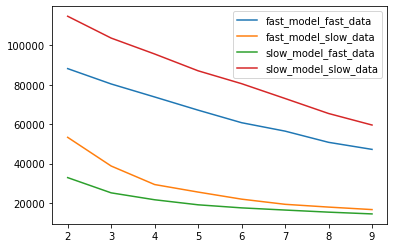

In [439]:

for name, data in d.items():
    data = {k:v for k,v in data.items()}
    average_inertia_over_samples = np.array(list(data.values())) / len(data.values())
    plt.plot(data.keys(), average_inertia_over_samples, label=name)
    print(average_inertia_over_samples.mean())
plt.legend()

In [440]:
first_half = fast_model_fast_data[:9500,:]
second_half = fast_model_fast_data[9500:,:]

In [441]:
model = KMeans(n_clusters=3, random_state=0)
first_half_labels = model.fit_predict(first_half)

def inertia(model, labels, data):
    return np.square(model.cluster_centers_[labels] - data).sum()

# test my inertia function
first_half_inertia = inertia(model, first_half_labels, first_half)
model.inertia_, first_half_inertia


(319190.893181838, 319190.8931818377)

In [442]:
second_half_labels = model.predict(second_half)

inertia(model, second_half_labels, second_half)

323616.86928607814

In [443]:
fast_model_slow_data_first_half = fast_model_slow_data[:9500]

fast_model_slow_data_first_half_labels = model.predict(fast_model_slow_data_first_half)

inertia(model, fast_model_slow_data_first_half_labels, fast_model_slow_data_first_half)

525488.9503709152

In [444]:
fast_model_slow_data_second_half = fast_model_slow_data[9500:]

fast_model_slow_data_second_half_labels = model.predict(fast_model_slow_data_second_half)

inertia(model, fast_model_slow_data_second_half_labels, fast_model_slow_data_second_half)

598071.3822380628

In [445]:
gt = np.load('/Users/kristjan.roosild/PycharmProjects/dat-sci-master-thesis/open-loop-results/nighttime-fast-auto-3d-model-nighttime-fast-auto-data-prediction-and-ground-truth.npy')[:, 2]
gt.shape

(19250,)

(array([ 7281., 10236.,  1733.]),
 array([-1.02451801, -0.31858345,  0.38735112,  1.09328568]),
 <BarContainer object of 3 artists>)

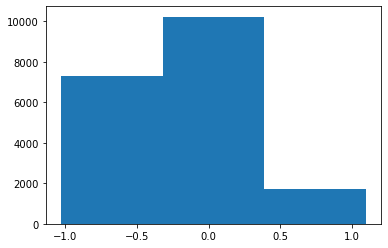

In [446]:
plt.hist(gt, bins=3)


(array([ 3391., 14407.,  1452.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

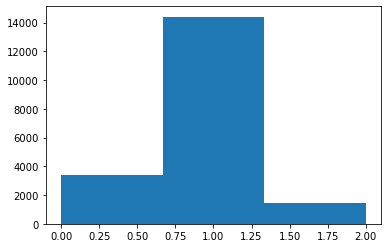

In [447]:
model = KMeans(n_clusters=3, random_state=0)
plt.hist(model.fit_predict(fast_model_fast_data), bins=3)


In [448]:

clazz = np.zeros(len(gt))

clazz[gt < -0.2] = -1
clazz[gt >= -0.2] = 0
clazz[gt > 0.2] = 1
clazz.mean(), gt.mean()

(-0.3197402597402597, -0.25687207360701125)

(array([8013.,    0.,    0.,    0.,    0., 9379.,    0.,    0.,    0.,
        1858.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

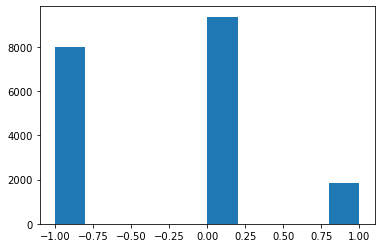

In [449]:
plt.hist(clazz)

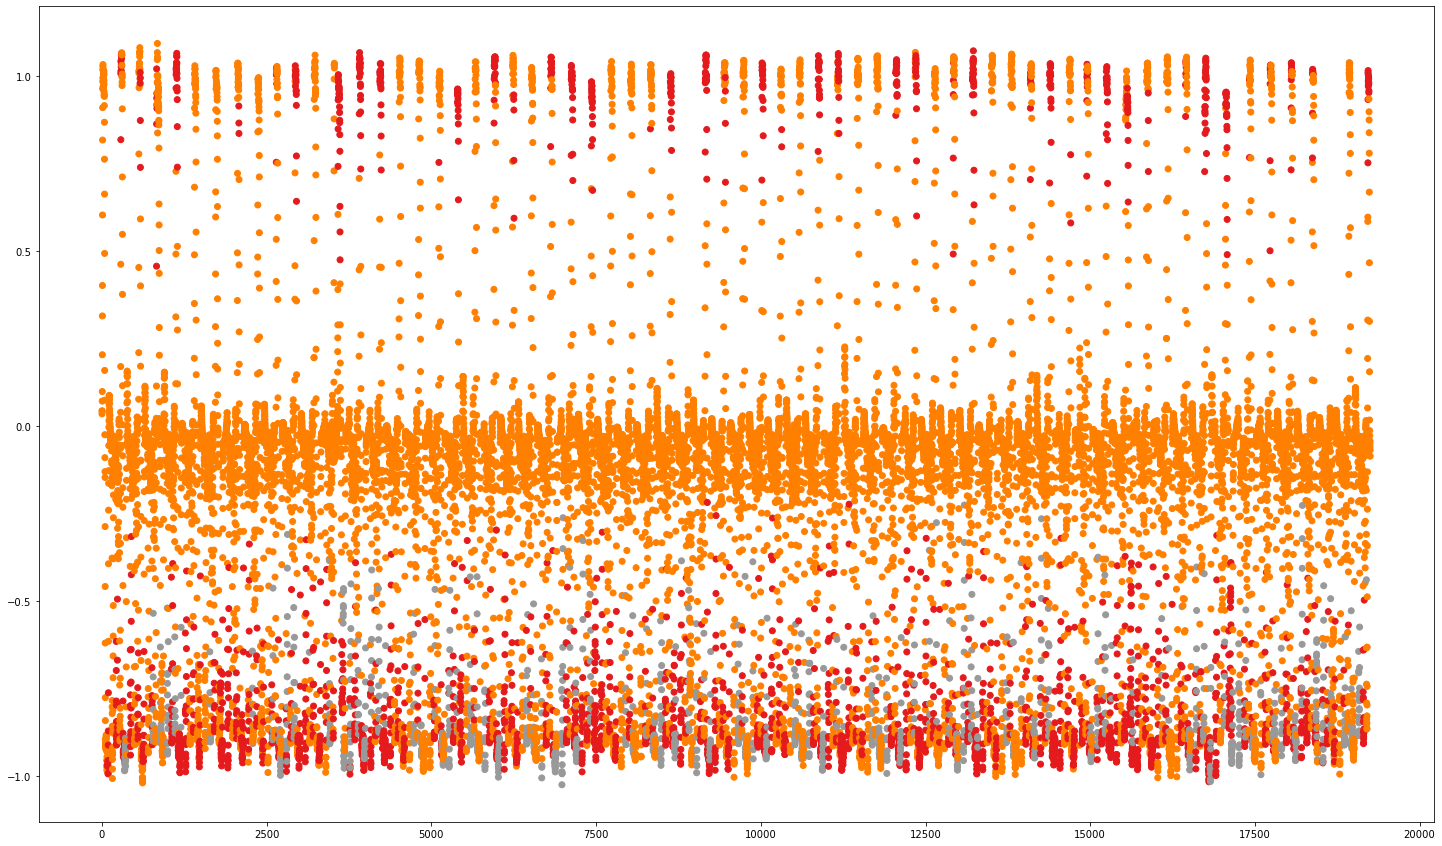

In [450]:
from matplotlib.pyplot import figure

figure(figsize=(25, 15))

plt.scatter(range(len(gt)), gt, c=model.fit_predict(fast_model_fast_data), cmap='Set1')



In [451]:
import pandas as pd

df = pd.DataFrame(np.array([clazz, model.fit_predict(fast_model_fast_data), np.ones_like(clazz)]).T, columns=['angle_class', 'three_clusters', 'a'])
df

,angle_class,three_clusters,a
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
19245,0.0,1.0,1.0
19246,0.0,1.0,1.0
19247,0.0,1.0,1.0
19248,0.0,1.0,1.0


In [452]:
df.groupby(['angle_class']).count()


,three_clusters,a
angle_class,,
-1.0,8013,8013
0.0,9379,9379
1.0,1858,1858


In [453]:
class_cluster_count = df.groupby(['angle_class', 'three_clusters']).count()

percentage_of_clusters_in_class = class_cluster_count['a'] / class_cluster_count.groupby('three_clusters')['a'].transform('sum') * 100

percentage_of_clusters_in_class

angle_class  three_clusters
-1.0         0.0                80.920083
             1.0                26.494065
             2.0               100.000000
 0.0         1.0                65.100298
 1.0         0.0                19.079917
             1.0                 8.405636
Name: a, dtype: float64